In [46]:
import pandas as pd
import numpy as np

# !pip install matplotlib
import matplotlib.pyplot as plt

In [44]:
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis

In [210]:

from TemporalAbstraction import NumericalAbstraction
from FrequencyAbstraction import FourierTransformation

In [8]:
df= pd.read_pickle("/home/ojas-srivastava/Desktop/data-science-template-main/data/interim/outlier_removed.pkl")

In [130]:
df.rename(columns={'acc-x':'acc_x'},inplace=True)
df.rename(columns={'acc-y':'acc_y'},inplace=True)
predictor_columns=list(df.columns[:6])


In [132]:
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams["figure.dpi"]=100
plt.rcParams["lines.linewidth"]=2



In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
 10  duration     9009 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 844.6+ KB


<Axes: xlabel='epoch (ms)'>

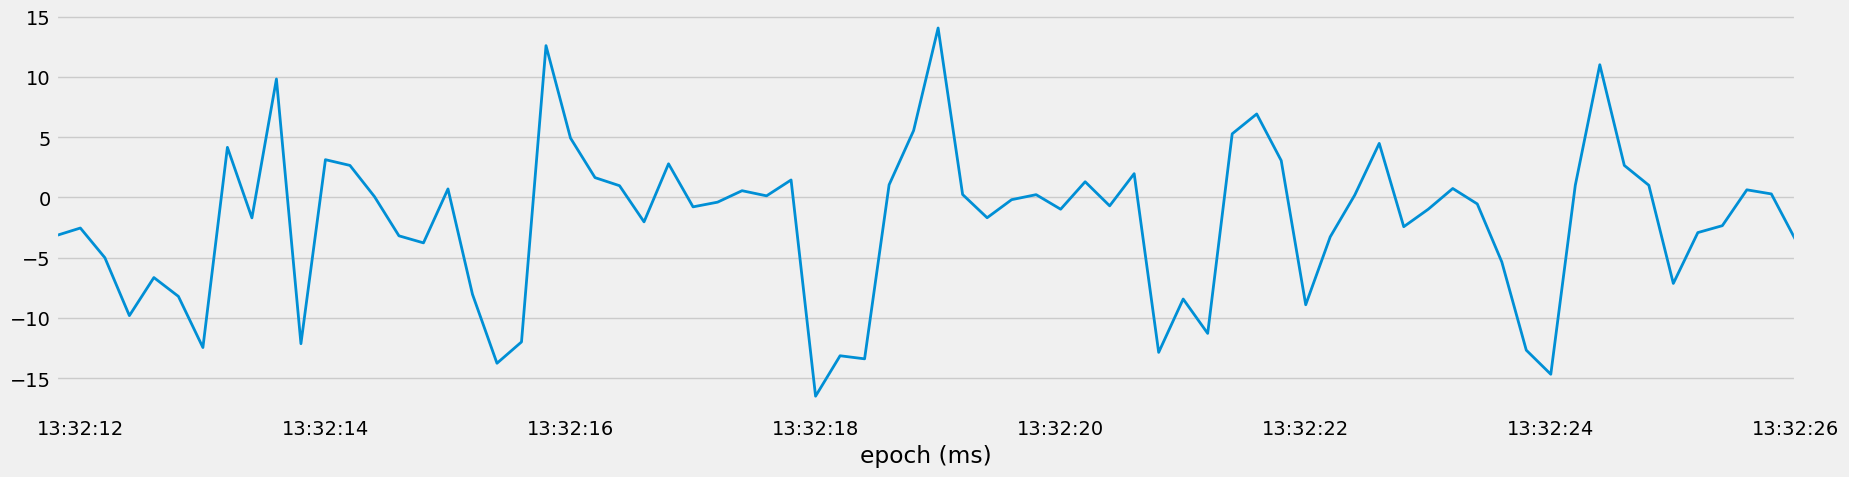

In [136]:
subset=df[df["set"]==35]["gyr_y"].plot()
subset

In [138]:
for col in predictor_columns:
    
    df[col]=df[col].interpolate()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   participant  9009 non-null   object 
 7   label        9009 non-null   object 
 8   category     9009 non-null   object 
 9   set          9009 non-null   int64  
 10  duration     9009 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 844.6+ KB


In [142]:
#calculating the average durations of a set
# df[df["set"]==50]["acc-y"].plot()
duration=df[df["set"]==1].index[-1] - df[df["set"]==1].index[0]
duration.seconds


for s in df["set"].unique():
    start=df[df["set"]==s].index[0]
    end=df[df["set"]==s].index[-1]
    
    duration= end-start
    df.loc[(df["set"]==s),"duration"]=duration.seconds
    
    

In [144]:
duration_df=df.groupby(["category"])["duration"].mean()
duration_df.iloc[0]/5
duration_df.iloc[1]/10


2.4942528735632186

In [148]:
#butterworth lowpass filter
df_lowpass= df.copy()
lowPass=LowPassFilter()
fs=1000/200
cutoff=1.3
df_lowpass=lowPass.low_pass_filter(df_lowpass,"acc_y",fs,cutoff,order=5)
df_lowpass
subset=df_lowpass[df_lowpass["set"]==45]
print(subset["label"][0])

ohp


/tmp/ipykernel_22492/3396265113.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset["label"][0])


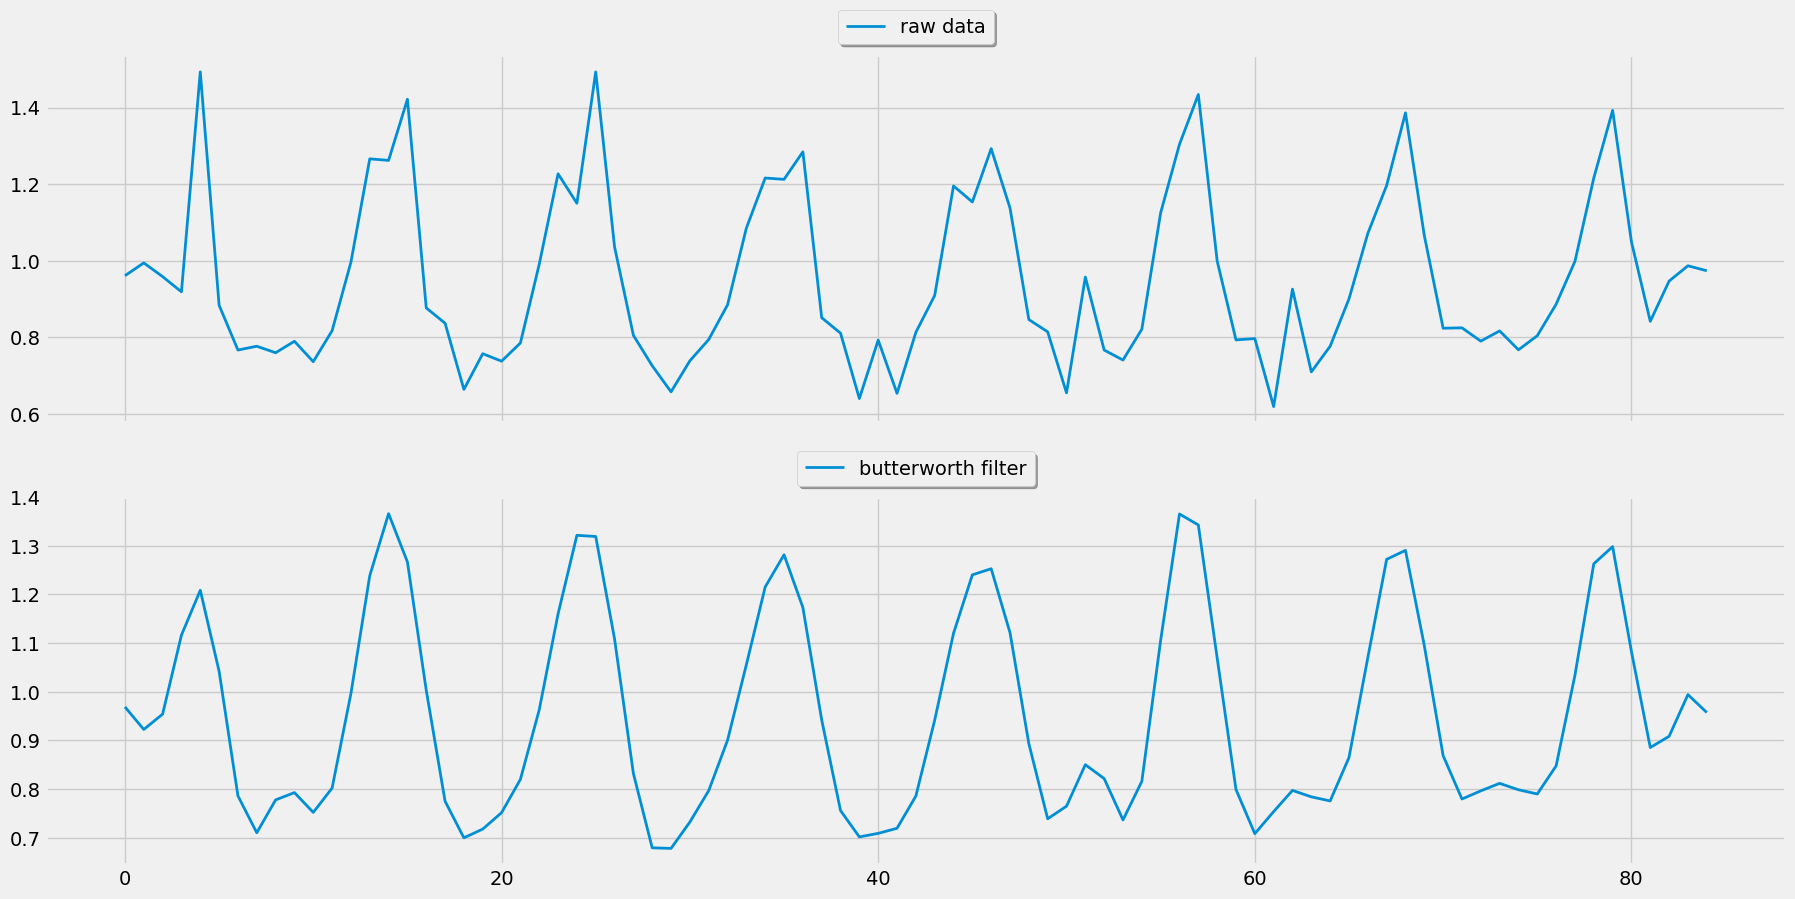

In [152]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20, 10))



ax[0].plot(subset ["acc_y"].reset_index(drop=True), label="raw data")



ax[1].plot(subset ["acc_y_lowpass"].reset_index(drop=True), label="butterworth filter")



ax[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)



ax [1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), fancybox=True, shadow=True)

In [154]:
for col in predictor_columns:
    df_lowpass=lowPass.low_pass_filter(df_lowpass,col,fs,cutoff,order=5)
    df_lowpass[col]=df_lowpass[col+"_lowpass"]
    del df_lowpass[col+"_lowpass"]

df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,11,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,11,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,11,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,11,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,11,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,E,row,medium,51,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,E,row,medium,51,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,E,row,medium,51,19.0


In [156]:
# princiapl component analysis
df_pca = df_lowpass.copy()
PCA= PrincipalComponentAnalysis()
pc_values=PCA.determine_pc_explained_variance(df_pca,predictor_columns)
pc_values

array([0.25965152, 0.23514096, 0.16968202, 0.16400986, 0.09670266,
       0.07481298])

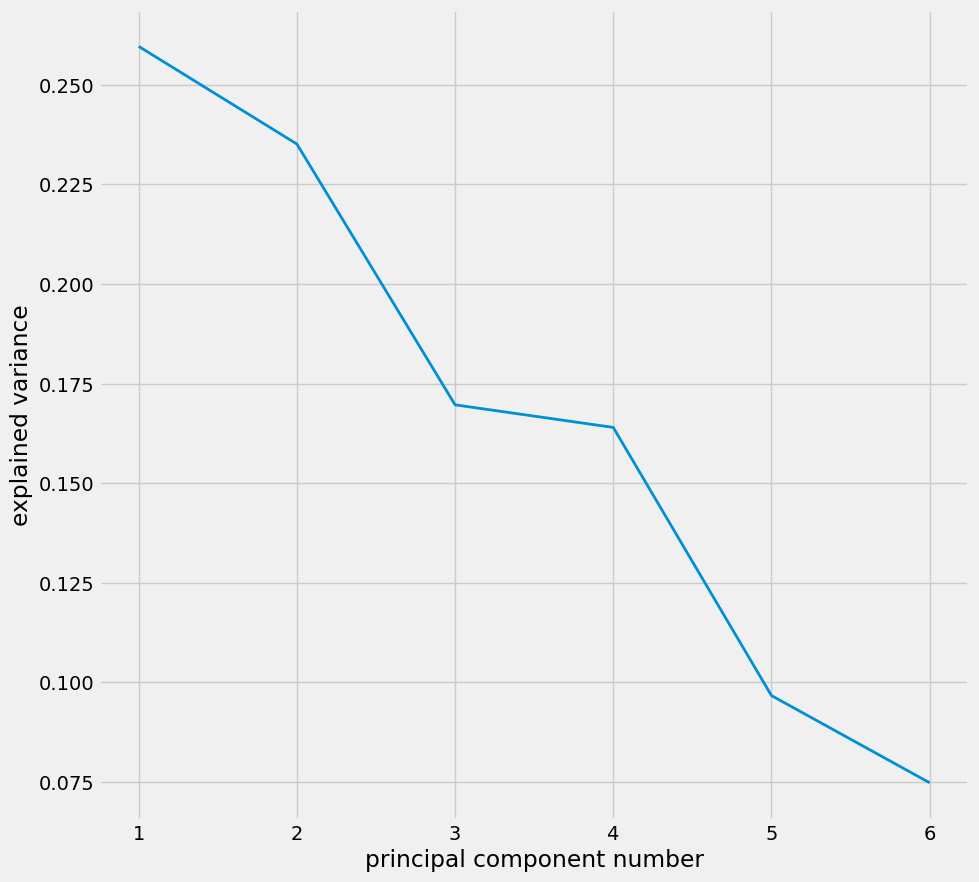

In [158]:
#elbow technique
plt.figure(figsize=(10,10))
plt.plot(range(1,len(predictor_columns)+1),pc_values)
plt.xlabel("principal component number")
plt.ylabel("explained variance")
plt.show()


In [160]:
df_pca=PCA.apply_pca(df_pca,predictor_columns,3)
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,-0.093319,0.999498,-0.530033,-0.139717,0.314486,0.006791,B,bench,heavy,11,16.0,-0.770200,-0.106756,0.585178
2019-01-11 15:08:05.400,-0.111620,0.995274,-0.516357,-0.060527,0.173231,-0.034207,B,bench,heavy,11,16.0,-0.771453,-0.154637,0.464447
2019-01-11 15:08:05.600,-0.173869,0.988344,-0.532738,0.183902,-0.005105,-0.109577,B,bench,heavy,11,16.0,-0.800501,-0.334057,0.261913
2019-01-11 15:08:05.800,-0.232240,0.983237,-0.571708,0.205625,-0.102079,-0.080465,B,bench,heavy,11,16.0,-0.868918,-0.315931,0.168852
2019-01-11 15:08:06.000,-0.223920,0.980294,-0.608025,0.000790,0.057743,-0.140139,B,bench,heavy,11,16.0,-0.885238,-0.264170,0.328353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.301647,-1.165675,-0.504448,0.064626,-0.141877,-0.033201,E,row,medium,51,19.0,-0.002327,-0.060286,-0.883932
2019-01-20 17:33:27.200,-0.294773,-1.237616,-0.510453,-0.196111,-0.045830,0.041754,E,row,medium,51,19.0,0.000792,0.144494,-0.783980
2019-01-20 17:33:27.400,-0.319157,-1.228018,-0.514753,-0.043619,-0.000731,0.018586,E,row,medium,51,19.0,-0.000555,0.014661,-0.787256


<Axes: xlabel='epoch (ms)'>

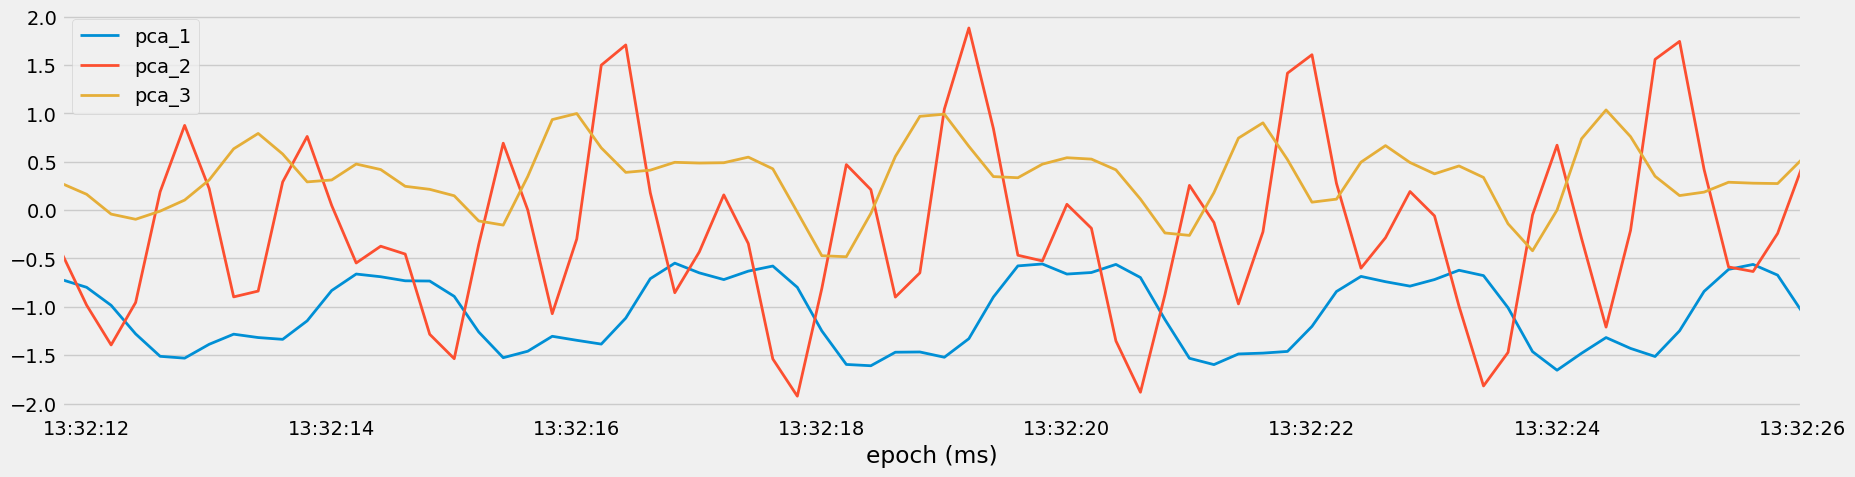

In [170]:
subset=df_pca[df_pca["set"]==35]
subset[["pca_1","pca_2","pca_3"]].plot()


In [174]:
df_sqaured= df_pca.copy()
acc_r= df_sqaured["acc_x"]**2+df_sqaured["acc_y"]**2+df_sqaured["acc_z"]**2
gyr_r= df_sqaured["gyr_x"]**2+df_sqaured["gyr_y"]**2+df_sqaured["gyr_z"]**2

In [176]:
df_sqaured["acc_r"]=np.sqrt(acc_r)
df_sqaured["gyr_r"]=np.sqrt(gyr_r)

array([<Axes: xlabel='epoch (ms)'>, <Axes: xlabel='epoch (ms)'>],
      dtype=object)

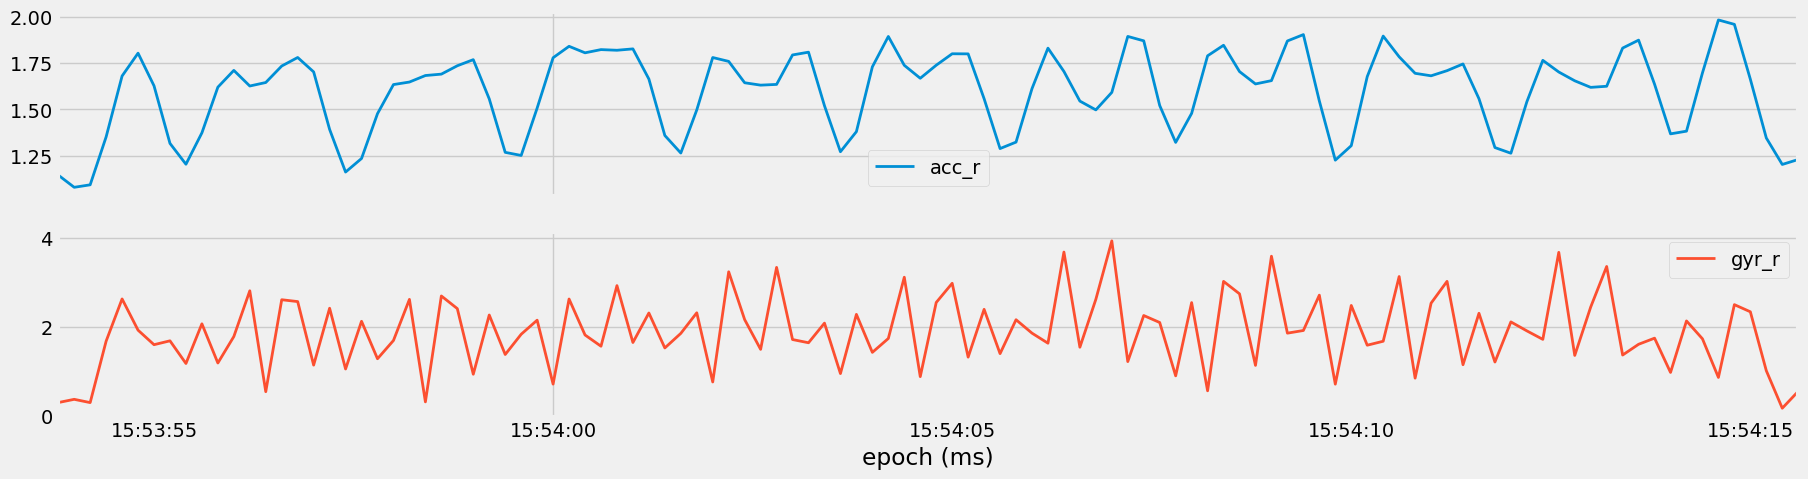

In [178]:
subset=df_sqaured[df_sqaured["set"]==14]
subset[["acc_r","gyr_r"]].plot(subplots=True)

In [180]:
df_sqaured
df_sqaured.rename(columns={'acc-x':'acc_x'},inplace=True)
df_sqaured.rename(columns={'acc-y':'acc_y'},inplace=True)

In [182]:
df_temporal= df_sqaured.copy()
df_temporal

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,-0.093319,0.999498,-0.530033,-0.139717,0.314486,0.006791,B,bench,heavy,11,16.0,-0.770200,-0.106756,0.585178,1.135183,0.344192
2019-01-11 15:08:05.400,-0.111620,0.995274,-0.516357,-0.060527,0.173231,-0.034207,B,bench,heavy,11,16.0,-0.771453,-0.154637,0.464447,1.126789,0.186662
2019-01-11 15:08:05.600,-0.173869,0.988344,-0.532738,0.183902,-0.005105,-0.109577,B,bench,heavy,11,16.0,-0.800501,-0.334057,0.261913,1.136162,0.214133
2019-01-11 15:08:05.800,-0.232240,0.983237,-0.571708,0.205625,-0.102079,-0.080465,B,bench,heavy,11,16.0,-0.868918,-0.315931,0.168852,1.160836,0.243262
2019-01-11 15:08:06.000,-0.223920,0.980294,-0.608025,0.000790,0.057743,-0.140139,B,bench,heavy,11,16.0,-0.885238,-0.264170,0.328353,1.175079,0.151571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.301647,-1.165675,-0.504448,0.064626,-0.141877,-0.033201,E,row,medium,51,19.0,-0.002327,-0.060286,-0.883932,1.305472,0.159399
2019-01-20 17:33:27.200,-0.294773,-1.237616,-0.510453,-0.196111,-0.045830,0.041754,E,row,medium,51,19.0,0.000792,0.144494,-0.783980,1.370820,0.205678
2019-01-20 17:33:27.400,-0.319157,-1.228018,-0.514753,-0.043619,-0.000731,0.018586,E,row,medium,51,19.0,-0.000555,0.014661,-0.787256,1.369255,0.047419


In [184]:
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

In [ ]:
Numabs=NumericalAbstraction()
predictor_columns=predictor_columns+["acc_r","gyr_r"]
##window size how many values to consider in one iteration
ws=int(1000/200)

    

In [198]:
df_temporal_list=[]
for s in df_temporal["set"].unique():
    subset=df_temporal[df_temporal["set"]==s].copy()
    for col in predictor_columns:
        subset=Numabs.abstract_numerical(subset,[col],ws,"mean")
        subset=Numabs.abstract_numerical(subset,[col],ws,"std")
    df_temporal_list.append(subset)
df_temporal=pd.concat(df_temporal_list)    
    
df_temporal 

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,-0.093319,0.999498,-0.530033,-0.139717,0.314486,0.006791,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,-0.111620,0.995274,-0.516357,-0.060527,0.173231,-0.034207,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.173869,0.988344,-0.532738,0.183902,-0.005105,-0.109577,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.232240,0.983237,-0.571708,0.205625,-0.102079,-0.080465,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.223920,0.980294,-0.608025,0.000790,0.057743,-0.140139,B,bench,heavy,11,...,0.038015,0.151708,0.087655,0.161457,-0.071519,0.058655,1.146810,0.020281,0.227964,0.073274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.301647,-1.165675,-0.504448,0.064626,-0.141877,-0.033201,E,row,medium,51,...,-0.113551,1.174077,0.079766,0.489826,0.014090,0.496176,1.276437,0.282249,1.137951,0.732088
2019-01-20 17:33:27.200,-0.294773,-1.237616,-0.510453,-0.196111,-0.045830,0.041754,E,row,medium,51,...,-0.157817,1.154556,0.094411,0.479884,0.026772,0.492510,1.294769,0.272337,1.104714,0.755373
2019-01-20 17:33:27.400,-0.319157,-1.228018,-0.514753,-0.043619,-0.000731,0.018586,E,row,medium,51,...,-0.118803,1.140639,0.077689,0.475427,0.027180,0.492498,1.316581,0.254295,1.062564,0.784420


<Axes: xlabel='epoch (ms)'>

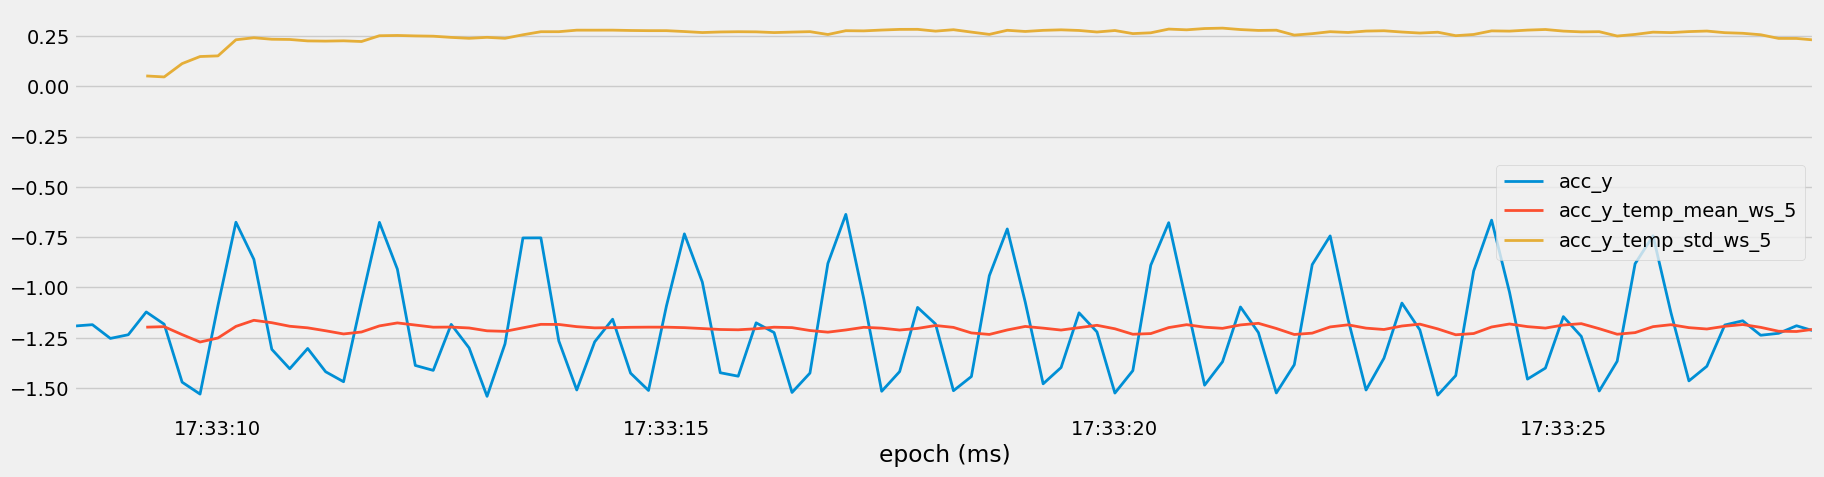

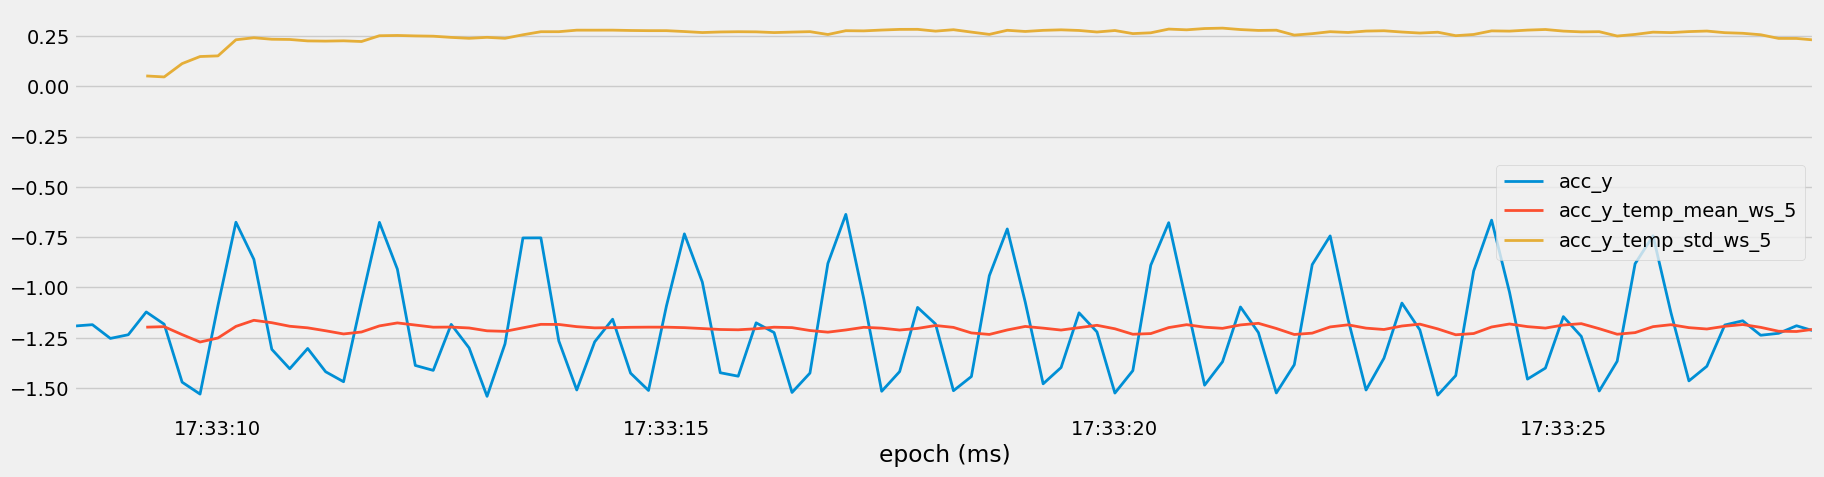

In [204]:
subset[["acc_y","acc_y_temp_mean_ws_5","acc_y_temp_std_ws_5"]].plot()
subset[["acc_y","acc_y_temp_mean_ws_5","acc_y_temp_std_ws_5"]].plot()

In [225]:
df_freq= df=df_temporal.copy().reset_index()
frqabs= FourierTransformation()
fs=int(1000/200)
ws=int(2800/200)
df_freq=frqabs.abstract_frequency(df_freq,["acc_y"],ws,fs)
df_freq.columns

Index(['epoch (ms)', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'participant', 'label', 'category', 'set', 'duration', 'pca_1', 'pca_2',
       'pca_3', 'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5',
       'acc_x_temp_std_ws_5', 'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5',
       'acc_z_temp_mean_ws_5', 'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5',
       'gyr_x_temp_std_ws_5', 'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5',
       'gyr_z_temp_mean_ws_5', 'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5',
       'acc_r_temp_std_ws_5', 'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5',
       'acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse',
       'acc_y_freq_0.0_Hz_ws_14', 'acc_y_freq_0.357_Hz_ws_14',
       'acc_y_freq_0.714_Hz_ws_14', 'acc_y_freq_1.071_Hz_ws_14',
       'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_1.786_Hz_ws_14',
       'acc_y_freq_2.143_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14'],
      dtype='object')

<Axes: >

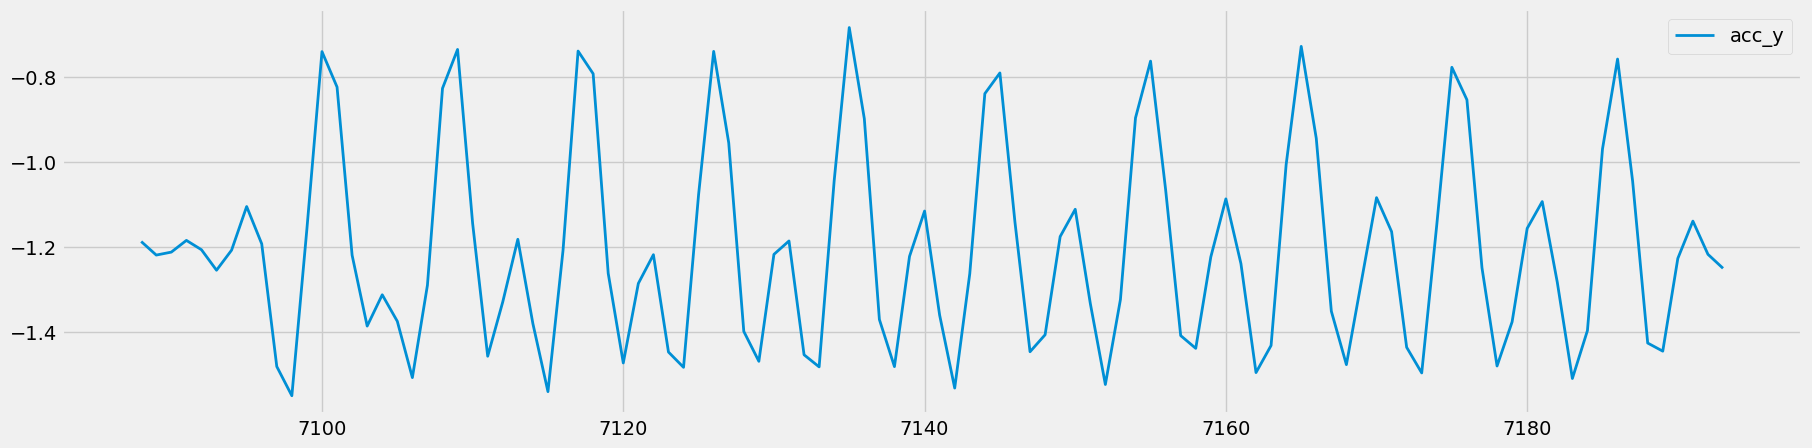

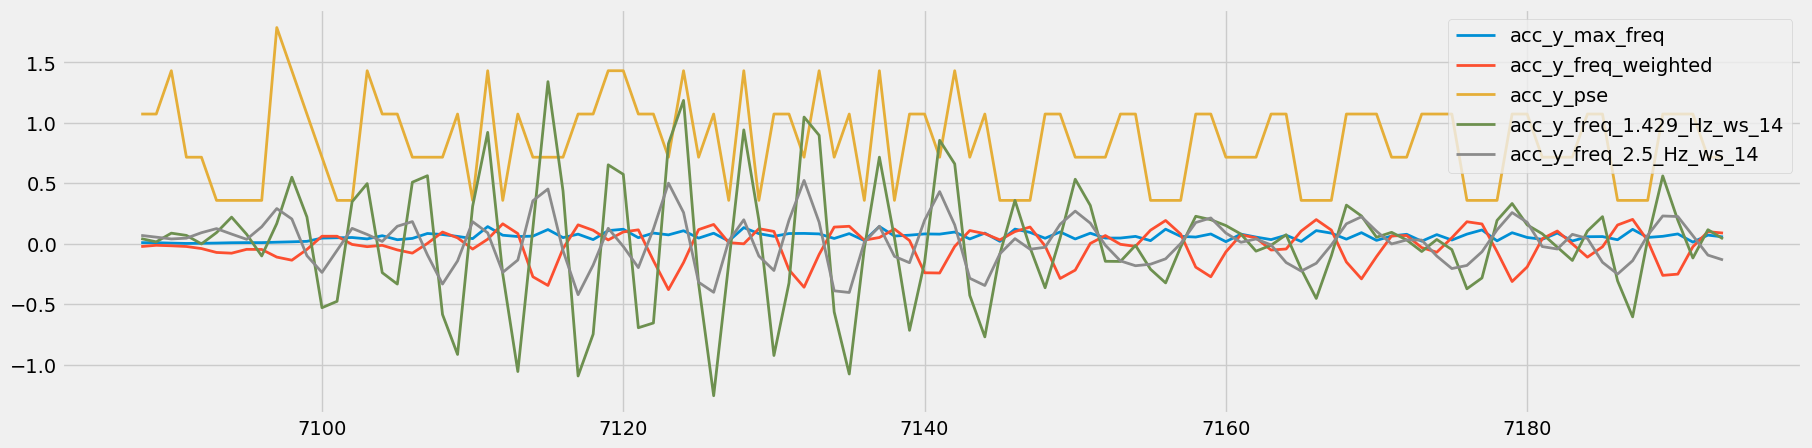

In [229]:
subset=df_freq[df_freq["set"]==15]
subset[["acc_y"]].plot()
subset[
[
    "acc_y_max_freq",
    "acc_y_freq_weighted",
    "acc_y_pse",
    "acc_y_freq_1.429_Hz_ws_14",
    "acc_y_freq_2.5_Hz_ws_14"    
]
].plot()


In [239]:
df_freq_list=[]
for s in df_freq["set"].unique():
    print(f"Applying fourier transformation to set {s}")
    subset=df_freq[df_freq["set"]==s].reset_index(drop=True).copy()
    subset=frqabs.abstract_frequency(subset,predictor_columns,ws,fs)
    df_freq_list.append(subset)

Applying fourier transformation to set 11
Applying fourier transformation to set 21
Applying fourier transformation to set 72
Applying fourier transformation to set 24
Applying fourier transformation to set 13
Applying fourier transformation to set 66
Applying fourier transformation to set 46
Applying fourier transformation to set 65
Applying fourier transformation to set 42
Applying fourier transformation to set 73
Applying fourier transformation to set 53
Applying fourier transformation to set 14
Applying fourier transformation to set 67
Applying fourier transformation to set 45
Applying fourier transformation to set 23
Applying fourier transformation to set 54
Applying fourier transformation to set 50
Applying fourier transformation to set 19
Applying fourier transformation to set 84
Applying fourier transformation to set 69
Applying fourier transformation to set 33
Applying fourier transformation to set 16
Applying fourier transformation to set 70
Applying fourier transformation to

In [265]:
df_freq=pd.concat(df_freq_list).set_index("epoch (ms)",drop=True)
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,-0.093319,0.999498,-0.530033,-0.139717,0.314486,0.006791,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,-0.111620,0.995274,-0.516357,-0.060527,0.173231,-0.034207,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.173869,0.988344,-0.532738,0.183902,-0.005105,-0.109577,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.232240,0.983237,-0.571708,0.205625,-0.102079,-0.080465,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.223920,0.980294,-0.608025,0.000790,0.057743,-0.140139,B,bench,heavy,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.301647,-1.165675,-0.504448,0.064626,-0.141877,-0.033201,E,row,medium,51,...,-0.186434,0.0,17.172836,-1.661508,1.693478,0.836104,0.093367,-2.717483,-0.101971,0.212875
2019-01-20 17:33:27.200,-0.294773,-1.237616,-0.510453,-0.196111,-0.045830,0.041754,E,row,medium,51,...,0.557650,0.0,16.453009,-2.301270,3.799668,4.472997,-0.918952,3.595679,0.872330,0.424229
2019-01-20 17:33:27.400,-0.319157,-1.228018,-0.514753,-0.043619,-0.000731,0.018586,E,row,medium,51,...,0.683939,0.0,14.077603,-3.993337,2.521840,1.914145,1.066870,1.029332,1.332080,2.000531


In [ ]:
df_freq=df_freq.dropna()
df_freq=df_freq.iloc[::2]##skipping every other row

In [333]:
#clustering
from sklearn.cluster import KMeans

In [343]:
df_cluster=df_freq.copy()
cluset_columns=["acc_x","acc_y","acc_z"]
k_values=range(2,10)
inertias=[]


In [361]:
for k in k_values:
    subset=df_cluster[cluset_columns]
    kmeans=KMeans(n_clusters=k,n_init=20,random_state=0)
    cluster_labels=kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

ValueError: x and y must have same first dimension, but have shapes (8,) and (25,)

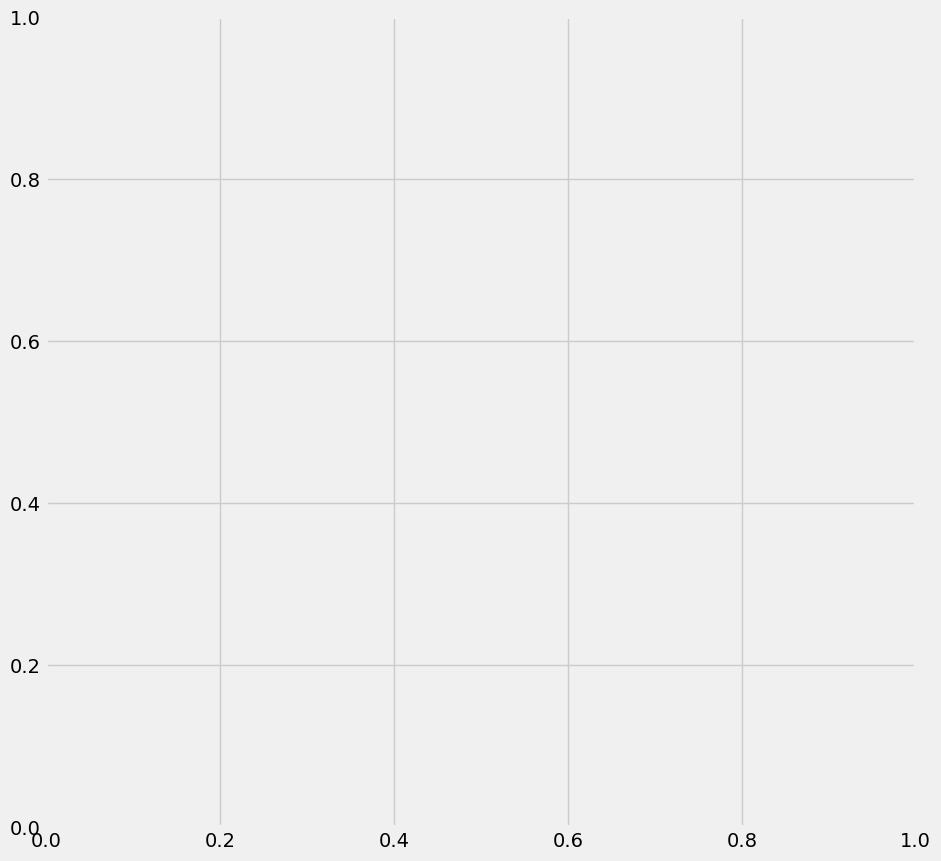

In [363]:
plt.figure(figsize=[10,10])
plt.plot(k_values,inertias)
plt.xlabel("k")
plt.ylabel("Sum of sqaured distance")
plt.show()

In [367]:
kmeans=KMeans(n_clusters=5,n_init=20,random_state=0)
subset=df_cluster[cluset_columns]
df_cluster["cluster"]=kmeans.fit_predict(subset)

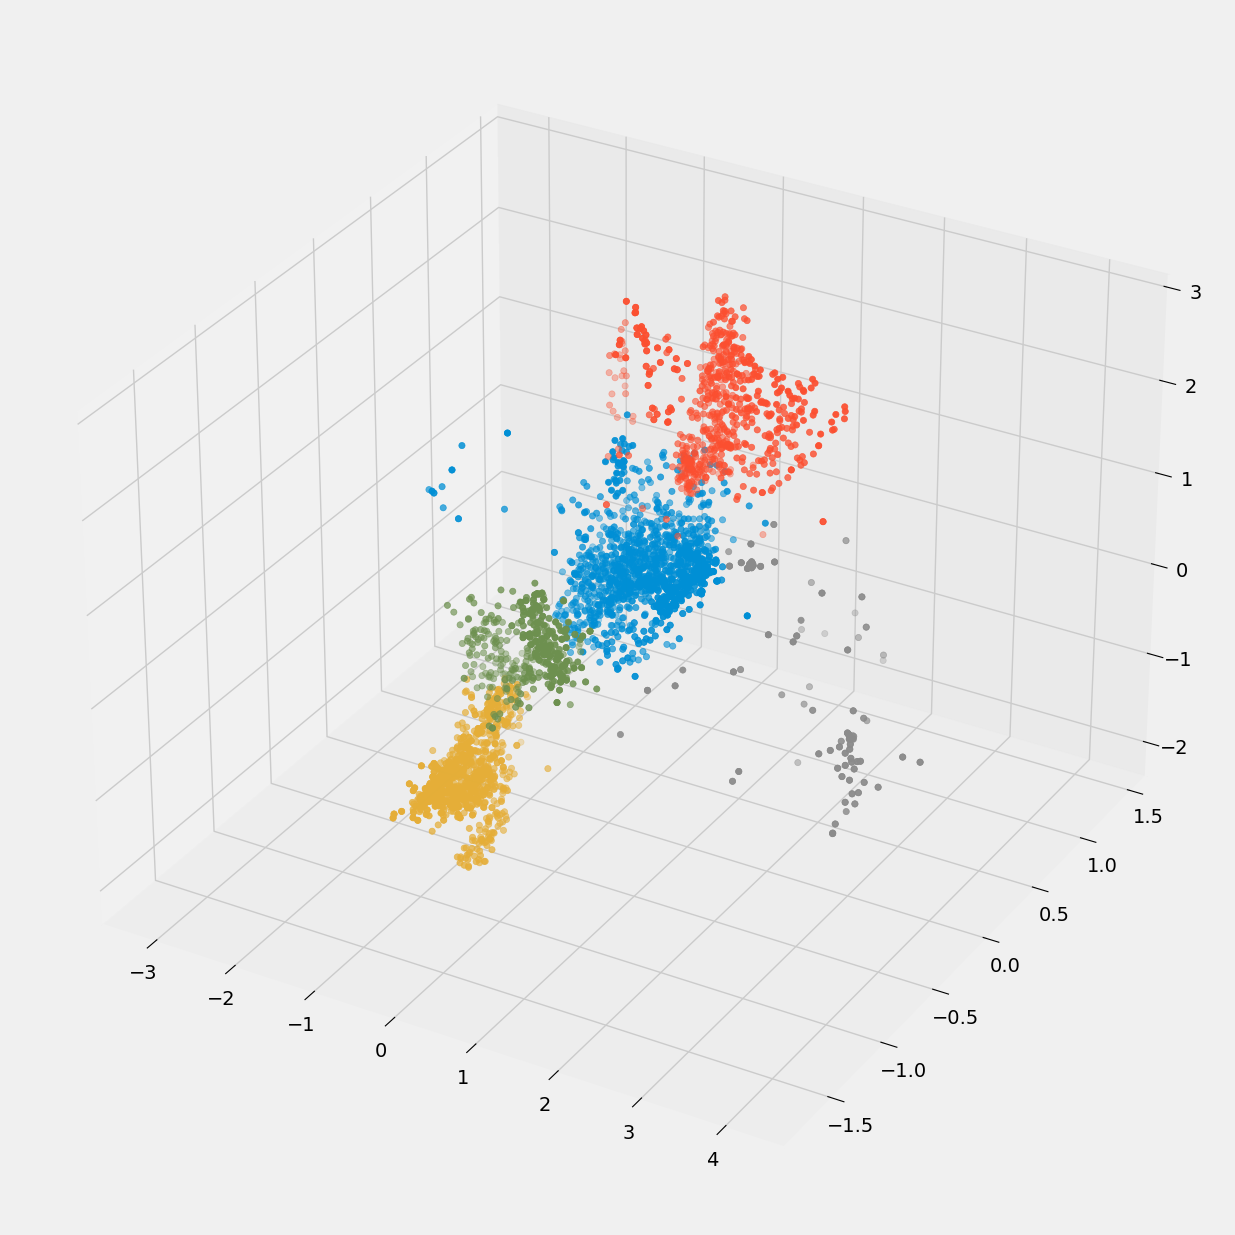

In [384]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(projection="3d")
for c in df_cluster["cluster"].unique():
    subset=df_cluster[df_cluster["cluster"]==c]
    ax.scatter(subset["acc_x"],subset["acc_y"],subset["acc_z"],label=c)


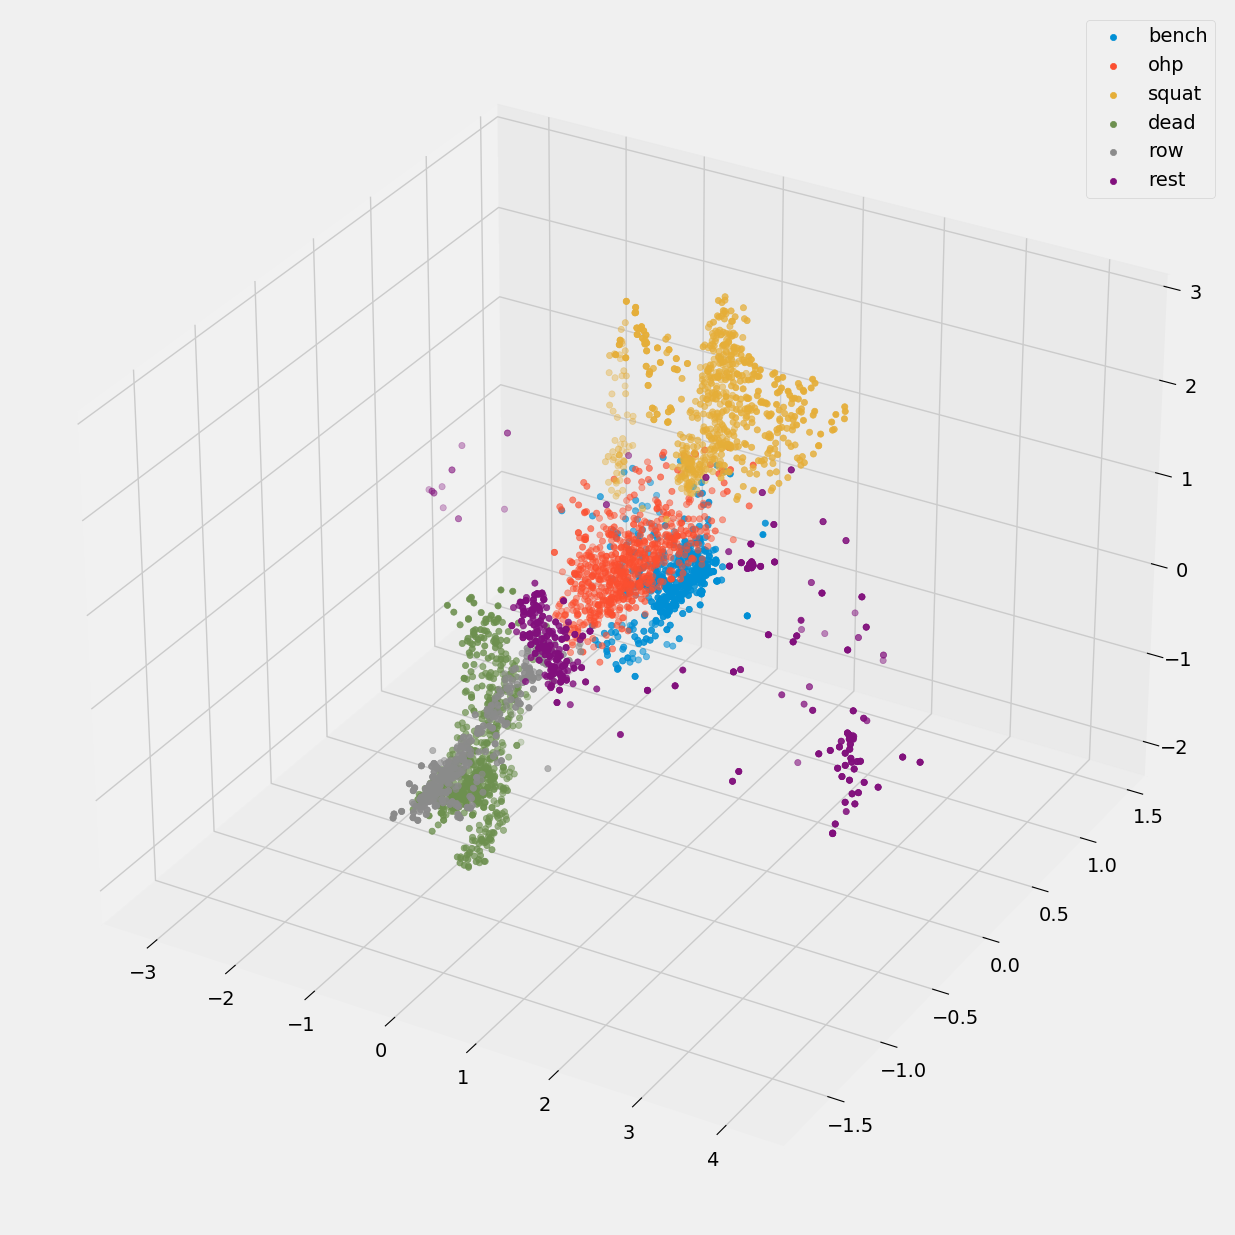

In [400]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(projection="3d")
for l in df_cluster["label"].unique():
    subset=df_cluster[df_cluster["label"]==l]
    ax.scatter(subset["acc_x"],subset["acc_y"],subset["acc_z"],label=l)
plt.legend()

In [404]:
df_cluster.to_csv("/home/ojas-srivastava/Desktop/data-science-template-main/data/interim/03_data_features.csv")